In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uae-auto-market-sales-data-for-advanced-analytics/dubizzle_cars_dataset.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
df = pd.read_csv('/kaggle/input/uae-auto-market-sales-data-for-advanced-analytics/dubizzle_cars_dataset.csv')

In [4]:
df.head()

,price,brand,model,trim,kilometers,year,vehicle_age_years,regional_specs,doors,body_type,...,interior_color,warranty,address,country,city,area_name,location_name,latitude,longitude,seller_type
0,129900,Dodge,Ram,1500 SLT Crew,47566,2021,3,GCC Specs,4,Pick Up Truck,...,Unknown,Yes,"Al Khabaisi, Deira, Dubai, UAE",UAE,Dubai,Deira,Al Khabaisi,25.266173,55.337772,Dealership/Certified Pre-Owned
1,319900,Alfa Romeo,Stelvio,Quadrifoglio,8914,2020,4,GCC Specs,5,SUV,...,Black,Yes,"Abu Hail, Deira, Dubai, UAE",UAE,Dubai,Deira,Abu Hail,25.275416,55.346450,Dealership/Certified Pre-Owned
2,149900,Audi,Q5,S-line,72205,2019,5,GCC Specs,5,SUV,...,Brown,Yes,"Al Khabaisi, Deira, Dubai, UAE",UAE,Dubai,Deira,Al Khabaisi,25.266173,55.337772,Dealership/Certified Pre-Owned
3,79900,Alfa Romeo,GIULIETTA,Veloce,49193,2021,3,GCC Specs,4,Hatchback,...,Black,Yes,"Al Khabaisi, Deira, Dubai, UAE",UAE,Dubai,Deira,Al Khabaisi,25.266173,55.337772,Dealership/Certified Pre-Owned
4,154900,GAC,GS8,GL,30,2024,0,GCC Specs,5,SUV,...,Other Color,Yes,"Al Khabaisi, Deira, Dubai, UAE",UAE,Dubai,Deira,Al Khabaisi,25.266173,55.337772,Dealership/Certified Pre-Owned


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9953 entries, 0 to 9952
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               9953 non-null   int64  
 1   brand               9953 non-null   object 
 2   model               9953 non-null   object 
 3   trim                9941 non-null   object 
 4   kilometers          9953 non-null   int64  
 5   year                9953 non-null   int64  
 6   vehicle_age_years   9953 non-null   int64  
 7   regional_specs      9953 non-null   object 
 8   doors               9953 non-null   int64  
 9   body_type           9953 non-null   object 
 10  fuel_type           9953 non-null   object 
 11  seating_capacity    9953 non-null   int64  
 12  transmission_type   9953 non-null   object 
 13  engine_capacity_cc  7992 non-null   object 
 14  horsepower          9495 non-null   object 
 15  no_of_cylinders     9953 non-null   int64  
 16  exteri

In [6]:
df.isnull().sum()

price                    0
brand                    0
model                    0
trim                    12
kilometers               0
year                     0
vehicle_age_years        0
regional_specs           0
doors                    0
body_type                0
fuel_type                0
seating_capacity         0
transmission_type        0
engine_capacity_cc    1961
horsepower             458
no_of_cylinders          0
exterior_color           0
interior_color           0
warranty                 0
address                  0
country                  0
city                     0
area_name              619
location_name         5320
latitude               373
longitude              373
seller_type              0
dtype: int64

In [7]:
df = df.dropna()

In [8]:
# Using Matplotlib style with Seaborn version 0.8
plt.style.use('seaborn-v0_8-darkgrid')

# Alternatively, use Seaborn API to set style
sns.set_style("darkgrid")
sns.set_palette("colorblind")

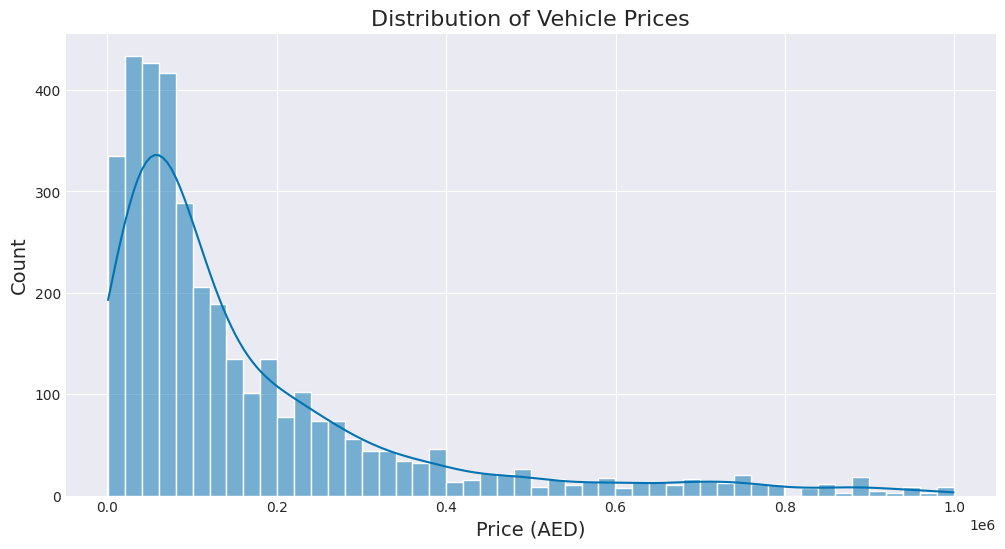

In [9]:
warnings.filterwarnings('ignore', category=FutureWarning, module='seaborn')

# Replace infinity values with NaN
df['price'] = df['price'].replace([np.inf, -np.inf], np.nan)

# Histogram of vehicle prices
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='price', kde=True, bins=50)
plt.title('Distribution of Vehicle Prices', fontsize=16)
plt.xlabel('Price (AED)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

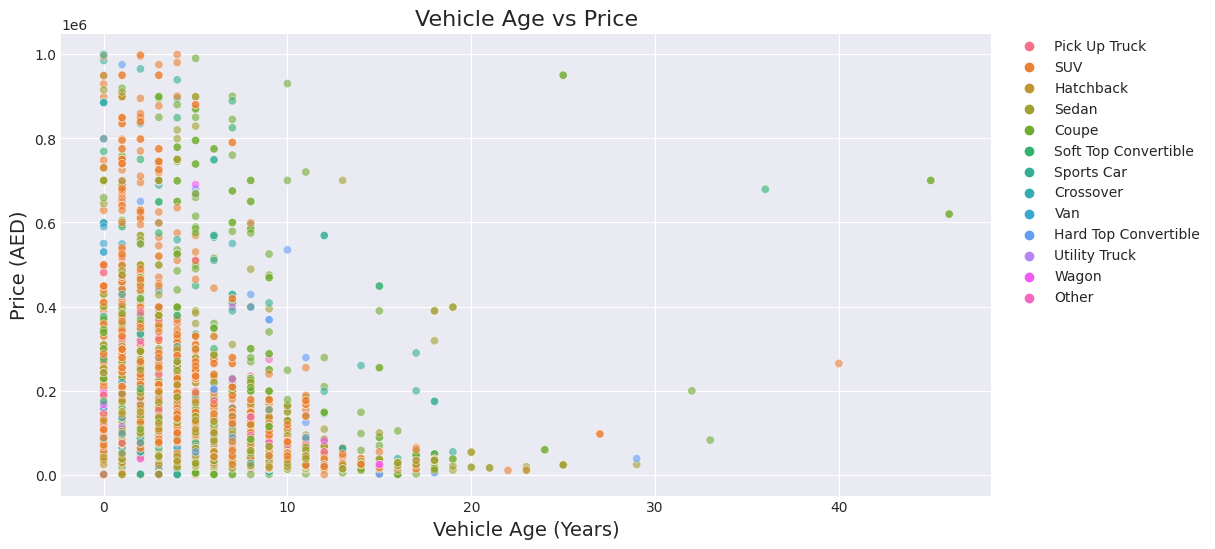

In [10]:
# Scatter plot of vehicle age vs price
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='vehicle_age_years', y='price', hue='body_type', alpha=0.6)
plt.title('Vehicle Age vs Price', fontsize=16)
plt.xlabel('Vehicle Age (Years)', fontsize=14)
plt.ylabel('Price (AED)', fontsize=14)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

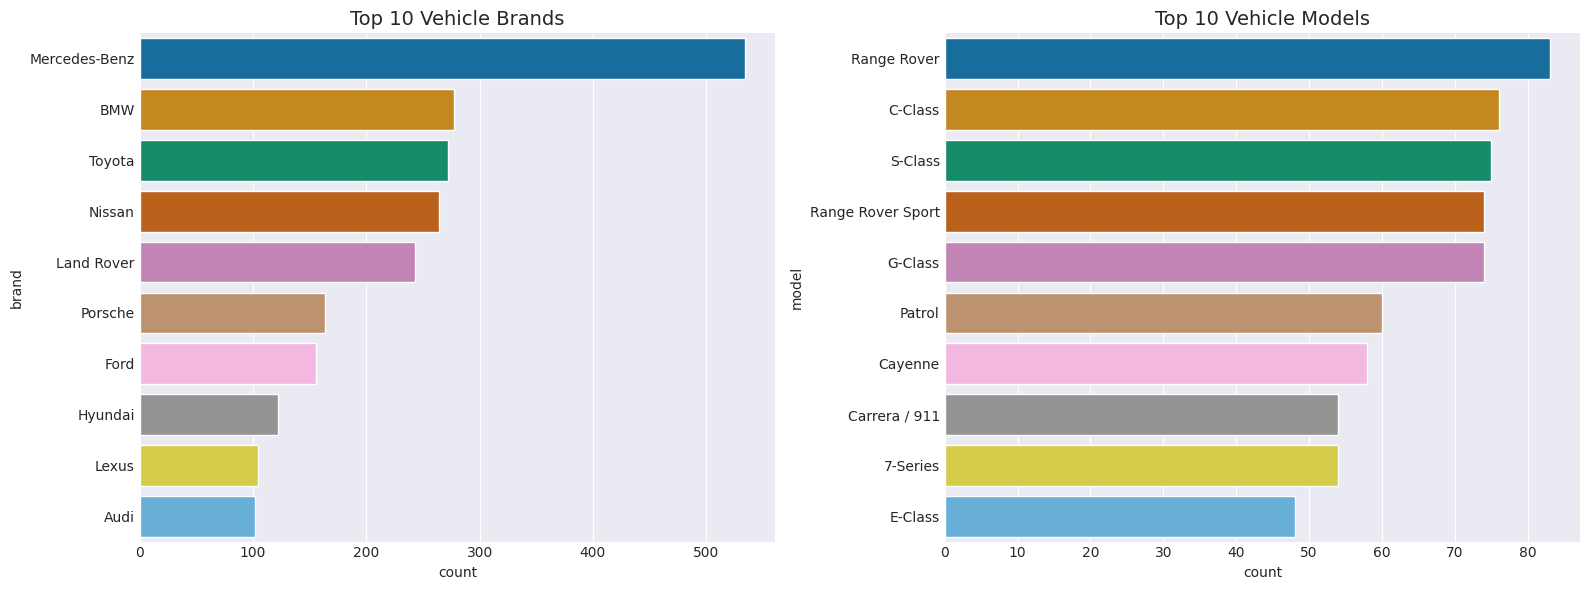

In [11]:
# Count plots of top brands and models
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=df, y='brand', order=df['brand'].value_counts().index[:10])
plt.title('Top 10 Vehicle Brands', fontsize=14)
plt.subplot(1, 2, 2)
sns.countplot(data=df, y='model', order=df['model'].value_counts().index[:10])
plt.title('Top 10 Vehicle Models', fontsize=14)
plt.tight_layout()
plt.show()

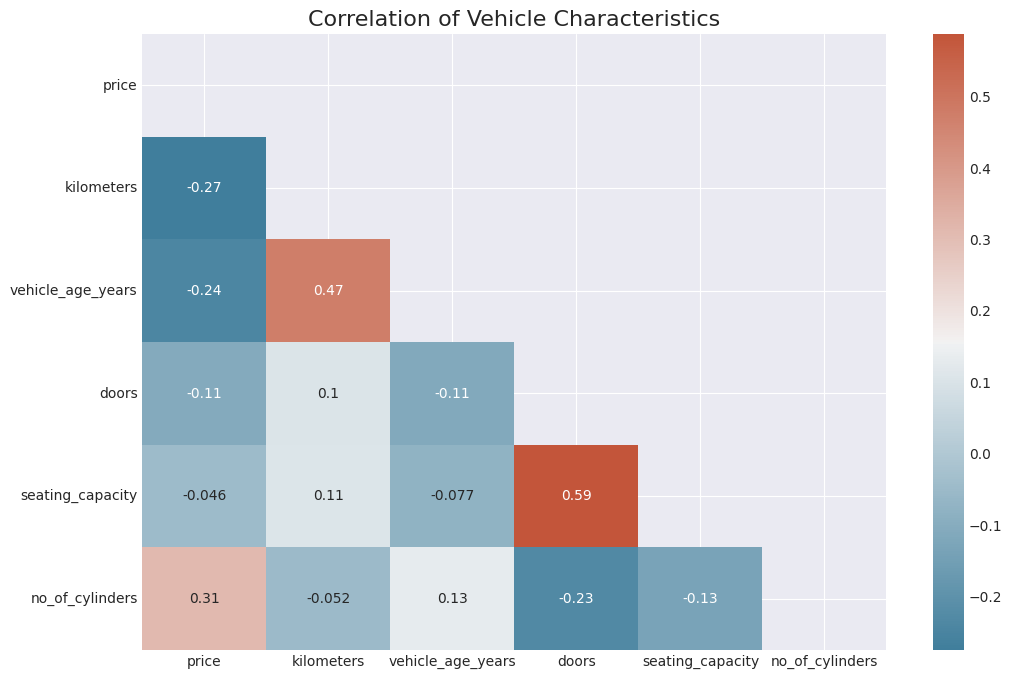

In [12]:
# Heatmap of vehicle characteristics
plt.figure(figsize=(12, 8))
corr = df[['price', 'kilometers', 'vehicle_age_years', 'doors', 'seating_capacity', 'no_of_cylinders']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, cmap=cmap, mask=mask)
plt.title('Correlation of Vehicle Characteristics', fontsize=16)
plt.show()

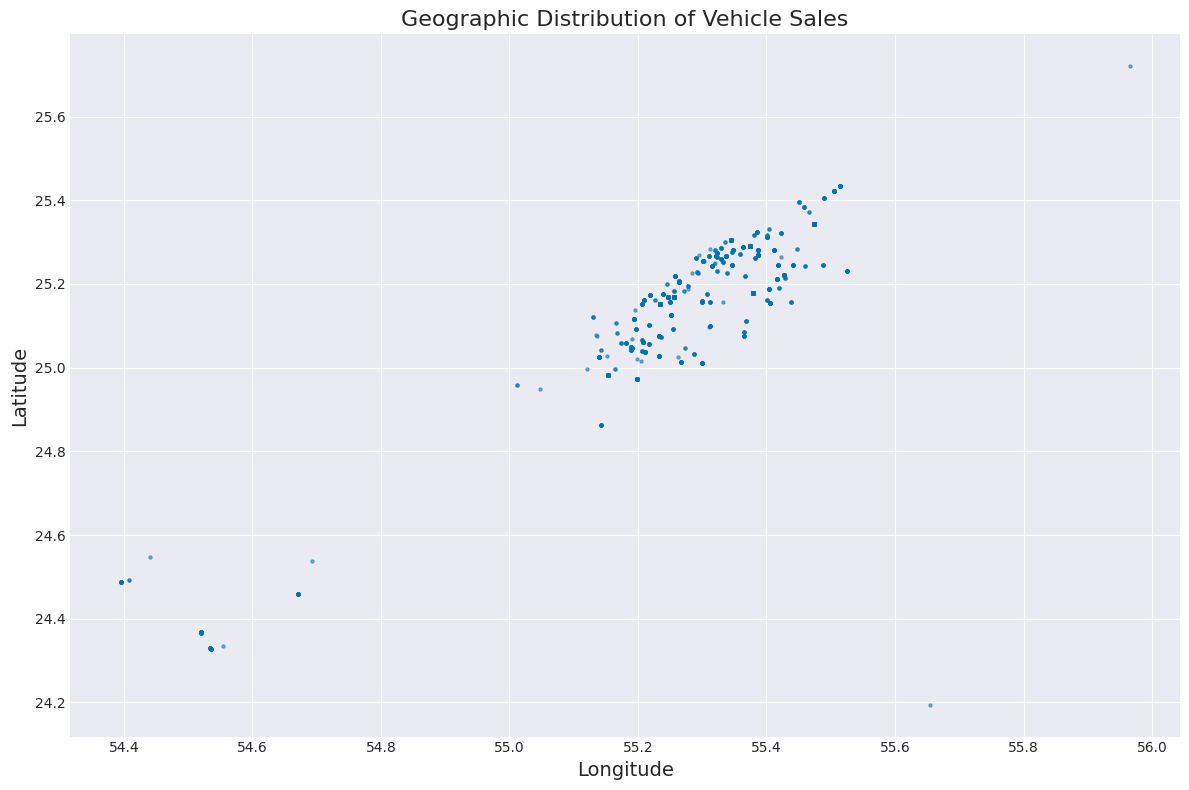

In [13]:
# Geographic distribution of vehicle sales
plt.figure(figsize=(12, 8))
locations = df[['latitude', 'longitude']].replace('missing', np.nan).dropna()
plt.scatter(locations['longitude'], locations['latitude'], s=5, alpha=0.5)
plt.title('Geographic Distribution of Vehicle Sales', fontsize=16)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.tight_layout()
plt.show()

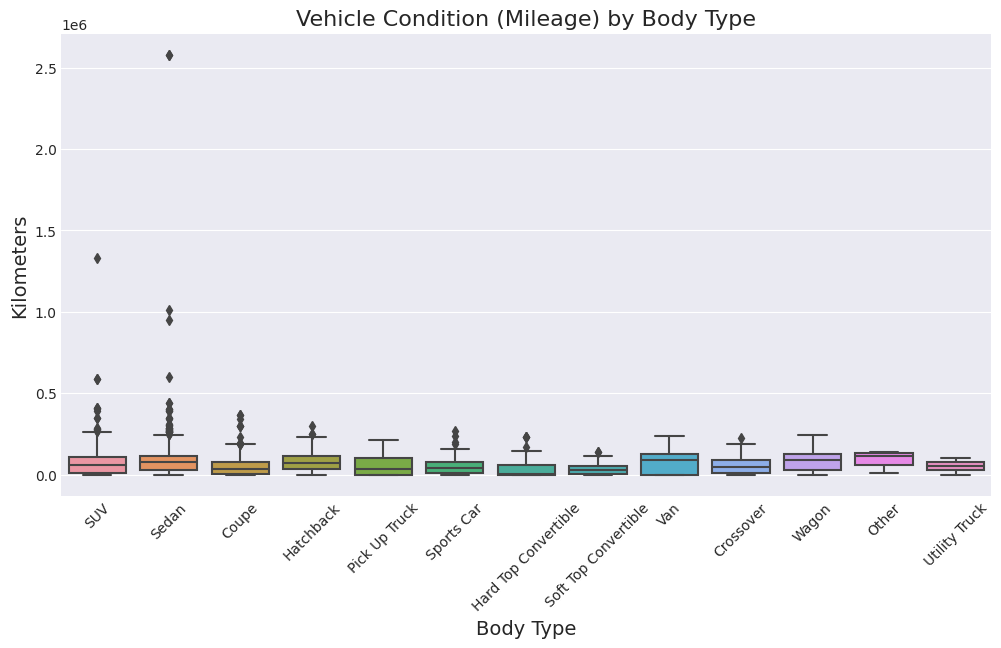

In [14]:
# Box plot of mileage by body type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='body_type', y='kilometers', order=df['body_type'].value_counts().index)
plt.title('Vehicle Condition (Mileage) by Body Type', fontsize=16)
plt.xlabel('Body Type', fontsize=14)
plt.ylabel('Kilometers', fontsize=14)
plt.xticks(rotation=45)
plt.show()

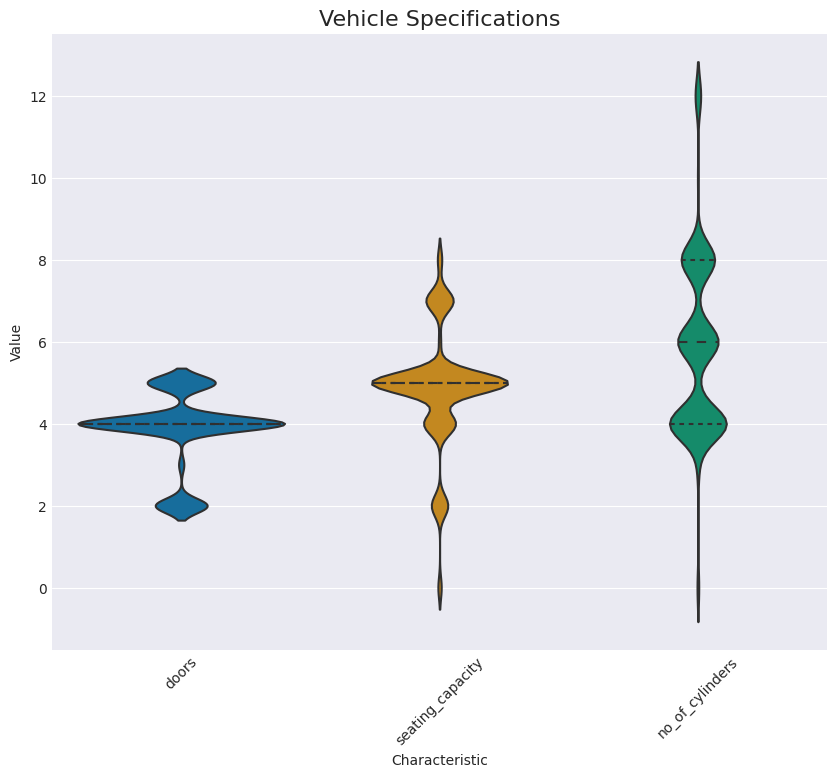

In [15]:
# Radar chart of vehicle specifications
plt.figure(figsize=(10, 8))
data = df[['doors', 'seating_capacity', 'no_of_cylinders']].dropna()
data = data.melt(var_name='Characteristic', value_name='Value')
sns.violinplot(data=data, x='Characteristic', y='Value', inner='quart')
plt.title('Vehicle Specifications', fontsize=16)
plt.xticks(rotation=45)
plt.show()